
# ТМО РК1 ИУ5-62Б Кириллова Вариант 9
## Задача 2, датасет 1
## Задача №2.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
Дополнительные требования по группам:

Для произвольной колонки данных построить гистограмму.

Набор данных load_iris из библиотеки sklearn не содержит пропусков и все признаки являются количественными (длина и ширина лепестка, длина и ширина чашелистика) и относятся к одному из трех видов ирисов, что является категориальной целевой переменной flower_size.

## Загрузим набор данных и добавим как категориальный признак, так и пропуски в данные, чтобы в дальнейшем их обработать

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

np.random.seed(0)
missing_values_count = 20
missing_indices = np.random.choice(df.shape[0], missing_values_count, replace=False)
df.loc[missing_indices, 'sepal length (cm)'] = np.nan
df['flower_size'] = pd.qcut(df['sepal length (cm)'].fillna(df['sepal length (cm)'].median() * df['sepal width (cm)'].median() + df['petal length (cm)'].median() * df['petal width (cm)'].median()), 4, labels=["small", "mid", "big", "large"])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_size  
0     0.0       small  
1     0.0       small  
2     0.0       small  
3     0.0       small  
4     0.0       small  


## Обработка пропусков

Для обработки пропусков в категориальном признаке flower_size мы можем использовать метод SimpleImputer с наиболее встречающимися. Для категориальных признаков потребовалось закодировать их, заполнить закодированными значениями, а потом раскодировать.

In [4]:
label_encoder = LabelEncoder()
df['flower_size'] = label_encoder.fit_transform(df['flower_size'])

imputer = SimpleImputer(strategy='median')
df['sepal length (cm)'] = imputer.fit_transform(df[['sepal length (cm)']])

imputer_mode = SimpleImputer(strategy='most_frequent')
df['flower_size'] = imputer_mode.fit_transform(df[['flower_size']])

df['flower_size'] = label_encoder.inverse_transform(df['flower_size'].astype(int))
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_size  
0     0.0       small  
1     0.0       small  
2     0.0       small  
3     0.0       small  
4     0.0       small  


## Построение модели
В данном наборе данных небольшое количество входных переменных и все они напрямую коррелируют с целевым признаком - классом ирисов. Поэтому для дальнейшего построения модели классификации можно включать все доступные входные переменные в модель. Если рассматривать данные в альтернативном контексте и строить модель регрессии для прогнозирования входных переменных, то стоило бы ещё воспользоваться one-hot кодированием класса ирисов.

## Гистограмма

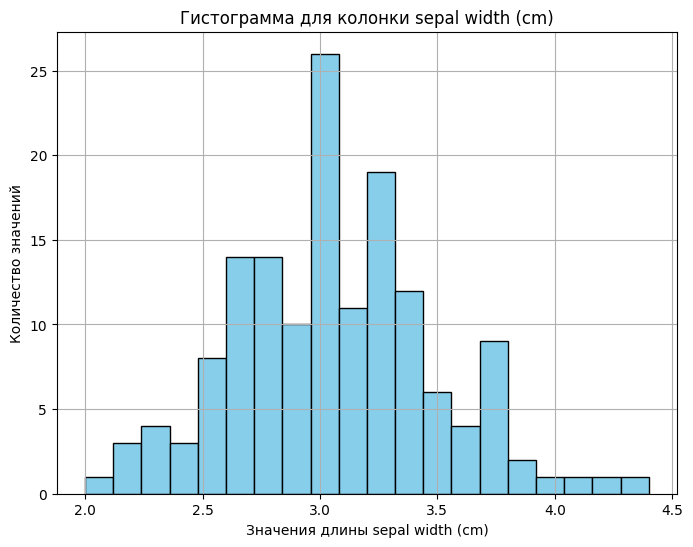

In [6]:
column_name = 'sepal width (cm)'
column_data = df[column_name]

plt.figure(figsize=(8, 6))
plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма для колонки {column_name}')
plt.xlabel(f'Значения длины {column_name}')
plt.ylabel('Количество значений')
plt.grid(True)
plt.show()